In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [2]:
df = pd.read_csv("Pricing_Engineered.csv")
df_x = df.drop(labels = ["Unnamed: 21","feature_1","feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "price"], axis = 1)
dfjustfeatures = df[["feature_1","feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8"]]

In [3]:
df["Age_Std"] = (df["AgeAtSale"]-df["AgeAtSale"].mean())/(df['AgeAtSale'].std())

In [23]:
df['ModelType'].unique()

array(['1', 'M', '3', '4', 'Z', '2', '6', 'Gran', 'I', '5', 'X', '7',
       'OTHER', 'Active'], dtype=object)

## Correlation of Features in Data

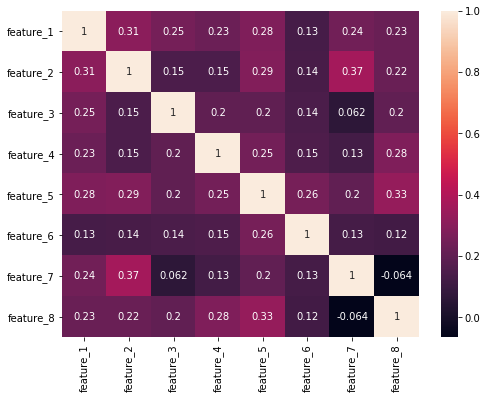

In [5]:
plt.figure(figsize=(8,6))

corrmatrix = dfjustfeatures.corr()
sea.heatmap(corrmatrix, annot= True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.show()

#### From this we see no real correlations in the features, so using the count of features is legitimate

## Correlation of all other Variables

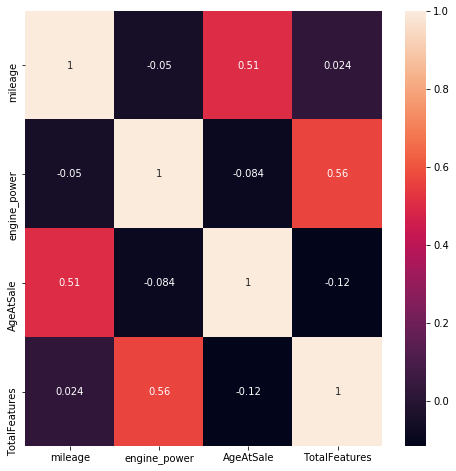

In [6]:
plt.figure(figsize=(8,8))

corrmatrix = df_x.corr()
sea.heatmap(corrmatrix, annot= True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.show()

#### Mileage and Age at sale are pretty highly correlated. Should only include one in the model so as not to double count age

In [7]:
df_x.groupby(by = "ModelType")[["TotalFeatures","AgeAtSale","engine_power","mileage"]].mean().sort_values(by = "engine_power",ascending = False)

,TotalFeatures,AgeAtSale,engine_power,mileage
ModelType,,,,
M,5.884615,5.137692,287.346154,114470.423077
6,5.666667,7.323333,231.666667,103527.500000
OTHER,6.000000,5.920000,225.000000,94374.000000
7,5.925926,6.166111,199.537037,141969.666667
X,4.585687,5.288540,146.388889,127973.701507
4,4.615385,3.726923,143.307692,84869.730769
5,4.776460,5.723248,142.973540,159372.875000
Gran,4.478827,4.020749,134.501629,126008.915309
Z,2.833333,11.603333,129.166667,104595.666667


#### Model type do seem to vary in each of these other categories. How should we account for that?

## Pairwise plots of Xs and Price

That hybrid price jump


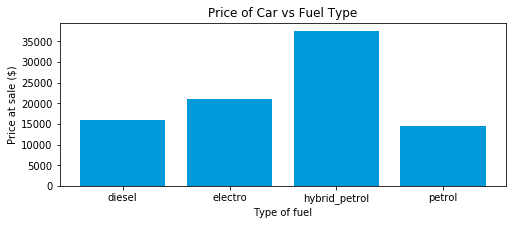

In [32]:
gb = df.groupby(by = "fuel")['price'].mean()

plt.figure(figsize = (8,3))
plt.bar(gb.index,gb, data = gb, color = '#009ADA')
plt.ylabel("Price at sale ($)")
plt.xlabel("Type of fuel")
plt.title("Price of Car vs Fuel Type")
print ("That hybrid price jump")

Some models are more expensive, good data here


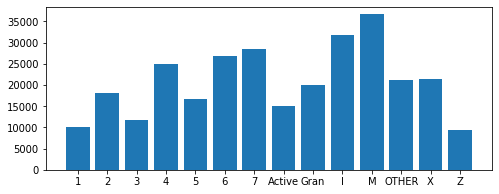

In [9]:
gb = df.groupby(by = "ModelType")['price'].mean()

plt.figure(figsize = (8,3))
plt.bar(gb.index,gb, data = gb)
print ("Some models are more expensive, good data here")

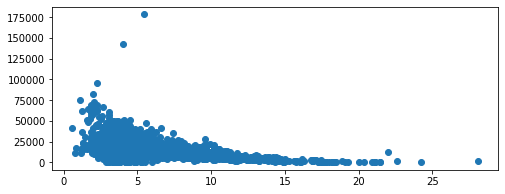

Unsurprisingly, price generally decreases with age. I think normalizing age may be smart


In [10]:
plt.figure(figsize = (8,3))
plt.scatter("AgeAtSale","price", data = df)
plt.show()
print ("Unsurprisingly, price generally decreases with age. I think normalizing age may be smart")

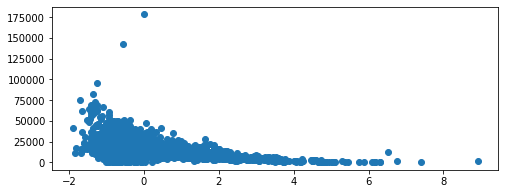

Same exact graph


In [11]:
plt.figure(figsize = (8,3))
plt.scatter("Age_Std","price", data = df)
plt.show()
print ("Same exact graph")

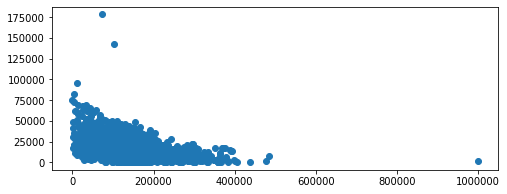

In [12]:
plt.figure(figsize = (8,3))
plt.scatter("mileage","price", data = df)
plt.show()

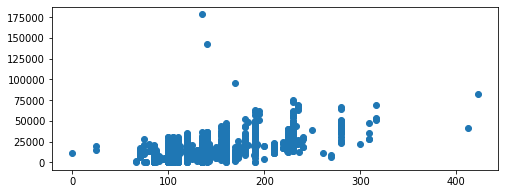

More powerful engine is typically pricier


In [13]:
plt.figure(figsize = (8,3))
plt.scatter("engine_power","price", data = df)
plt.show()
print ("More powerful engine is typically pricier")

Thankfully not much difference here, but nobody likes green


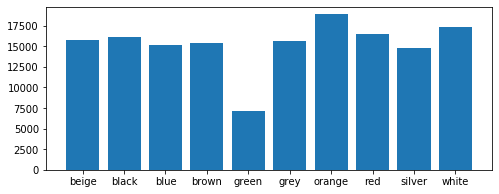

In [14]:
gb = df.groupby(by = "paint_color")['price'].mean()

plt.figure(figsize = (8,3))
plt.bar(gb.index,gb, data = gb)
print ("Thankfully not much difference here, but nobody likes green")

Coup and suv slightly more on average


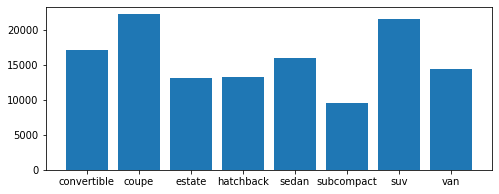

In [15]:
gb = df.groupby(by = "car_type")['price'].mean()

plt.figure(figsize = (8,3))
plt.bar(gb.index,gb, data = gb)
print ("Coup and suv slightly more on average")

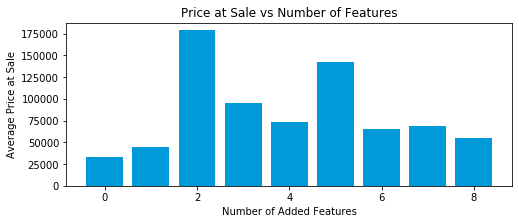

Surprisingly, number of features seemingly does not matter as much


In [38]:
plt.figure(figsize = (8,3))
plt.bar("TotalFeatures","price", data = df, color = '#009ADA')
plt.xlabel("Number of Added Features")
plt.ylabel("Average Price at Sale")
plt.title("Price at Sale vs Number of Features")
plt.show()
print ("Surprisingly, number of features seemingly does not matter as much")